# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")



In [2]:
# Import Dataset
data=pd.read_csv('ExtraaLearn.csv')




In [3]:
# View the first five rows of the dataset

data.head()


,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [4]:
# View the last five rows of the dataset
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [5]:
# Find the descriptive statistics
data.describe()


,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


In [6]:
# Check the column labels of the Dataframe
data.columns

Index(['ID', 'age', 'current_occupation', 'first_interaction',
       'profile_completed', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'last_activity', 'print_media_type1',
       'print_media_type2', 'digital_media', 'educational_channels',
       'referral', 'status'],
      dtype='object')

In [7]:
# Check the shape of the Dateframe
data.shape

(4612, 15)

In [8]:
# Let's look at data value types present
data.dtypes.value_counts()

object     10
int64       4
float64     1
dtype: int64

In [9]:
# Check the summary of the Dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [10]:
# Check for missing values in the Dataset

missing_values = data.isnull().sum()
print(missing_values)




ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64


In [11]:
# Check the count of the unique values in each column
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

## Data Overview

#### - ID is an identifier which is unique to each person.  We can drop this column as it would not be helpful in our analysis.
####  - The dataset has 4612 rows and 15 columns.
####  - Age, time_spent_on_website, page_views_per_visit, and status are all numerical values while the other columns are objects.
####  - There are no null values in the dataset.

#### Let's drop the ID column and define lists for numerical and catagorical colums to explore them seperately.

In [12]:
#Drop ID column
data = data.drop(["ID"], axis = 1)

In [13]:
#Create numerical columns
num_cols = ['age', 'time_spent_on_website','website_visits', 'page_views_per_visit', 'status']

#Create catagorical columns
cat_cols = ['current_occupation','first_interaction', 'profile_completed','last_activity', 'print_media_type1','print_media_type2', 'digital_media','educational_channels', 'referral']

## Exploratory Data Analysis (EDA)


In [14]:
#Check summary statistics
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


## Observations

#### - Average age is around 46 years.  The age range is from 18 - 63 indicating a good diverse interest.
#### - The average time spent on the website was 724.  This amount of time varied greatly, from 0 to 2537.
#### - The average page view per visit was about 3.
#### - Status indicates whether the lead was converted to a paid customer or not.  We see that just under 30% were converted.
#### - Customers who viewed over 3 pages and spent the most time on the website were more likely converted to paid customers.


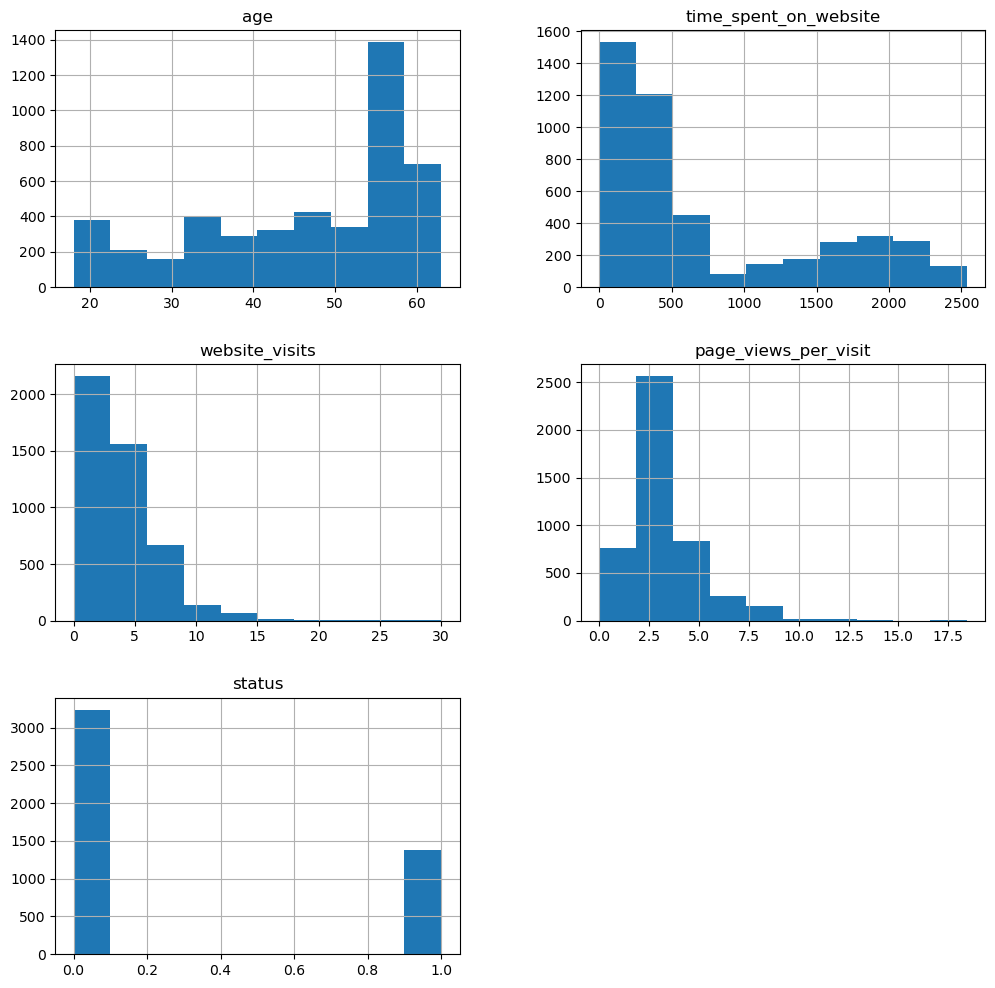

In [15]:
data[num_cols].hist(figsize = (12,12))
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
        
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),)

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points")

    plt.show()



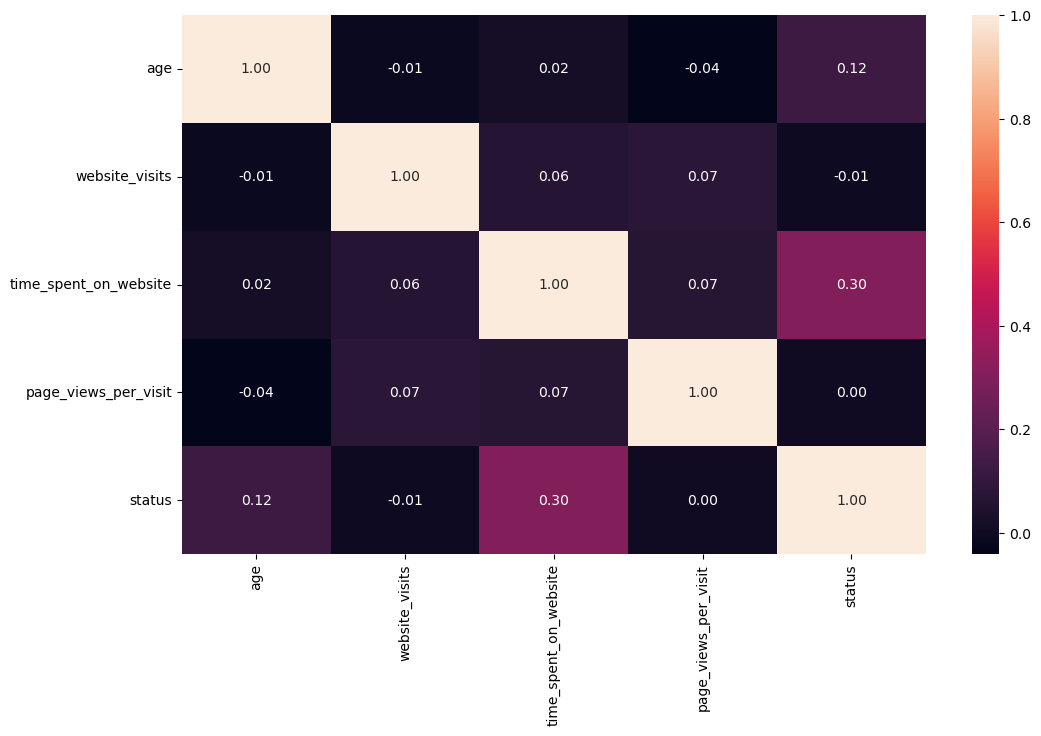

In [16]:
#plot heat map to view correlations
plt.figure(figsize = (12, 7))

sns.heatmap(data.corr(), annot = True, fmt = ".2f")

plt.show()

In [17]:
#Printing the subcatagories of each catagory
for i in cat_cols:
    print(data[i].value_counts(normalize = True))
    print('*'* 40)

Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
****************************************
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
****************************************
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
****************************************
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
****************************************
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: float64
****************************************
No     0.94948
Yes    0.05052
Name: print_media_type2, dtype: float64
****************************************
No     0.885733
Yes    0.114267
Name: digital_media, dtype: float64
****************************************
No     0.847138
Yes    0.152862
Name: educational_channels, dtype: float64
******

In [47]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

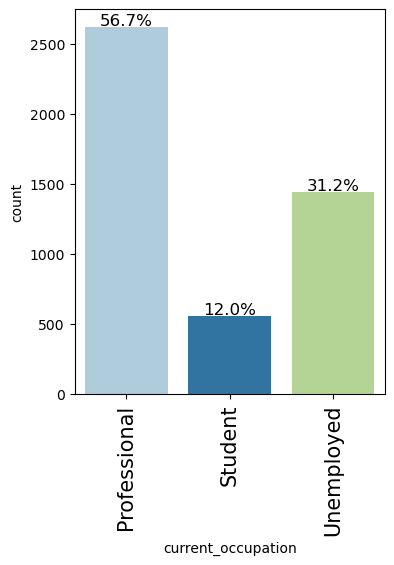

In [19]:
#plot current_occupation
labeled_barplot(data, "current_occupation", perc=True)

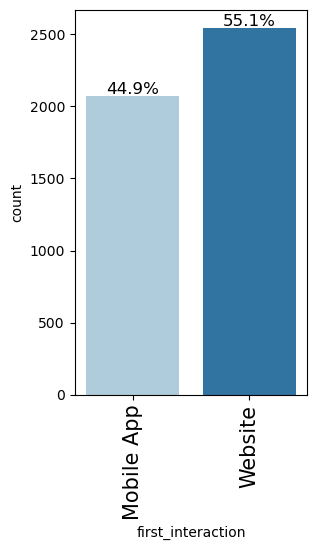

In [20]:
#plot first interaction
labeled_barplot(data, "first_interaction", perc=True)

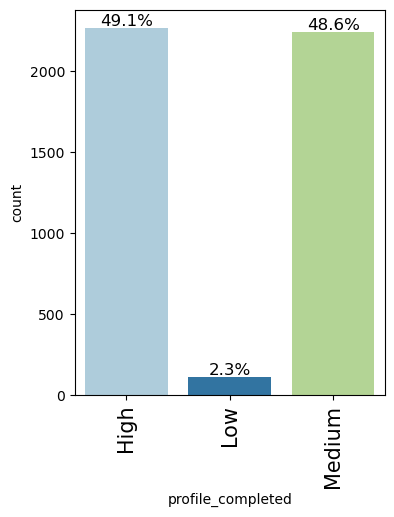

In [21]:
#plot profile completed
labeled_barplot(data, "profile_completed", perc=True)

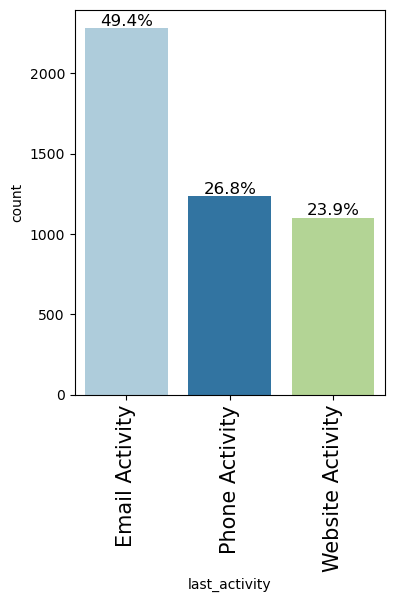

In [22]:
#plot last activity
labeled_barplot(data, "last_activity", perc=True)

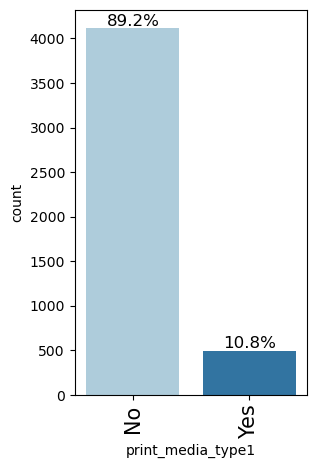

In [23]:
#plot print media type1
labeled_barplot(data, "print_media_type1", perc=True)

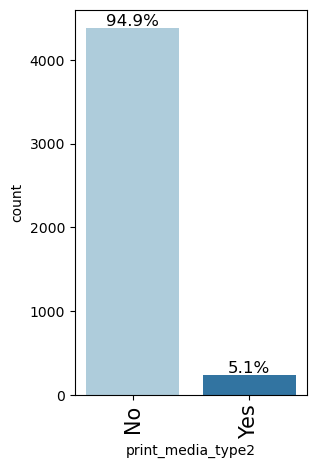

In [24]:
#plot print media type2
labeled_barplot(data, "print_media_type2", perc=True)

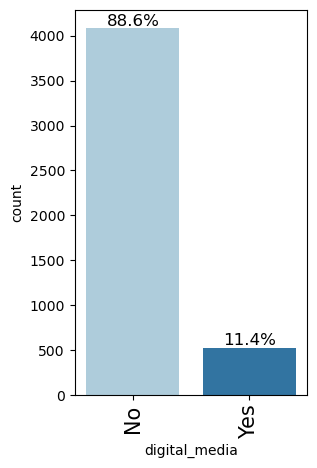

In [25]:
#plot digital media
labeled_barplot(data, "digital_media", perc=True)

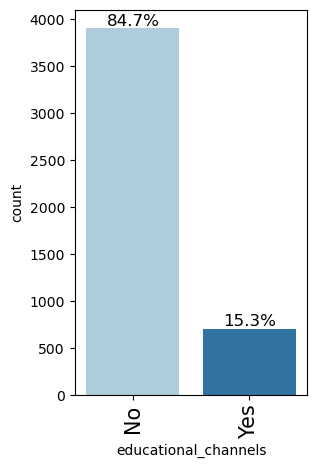

In [26]:
#plot educational channels
labeled_barplot(data, "educational_channels", perc=True)

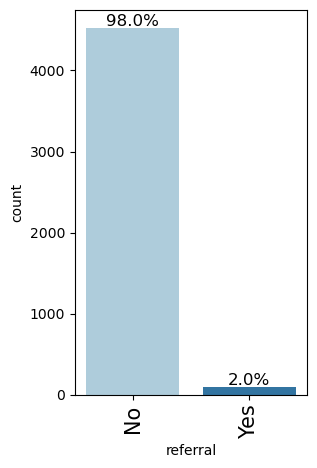

In [27]:
#plot referral
labeled_barplot(data, "referral", perc=True)

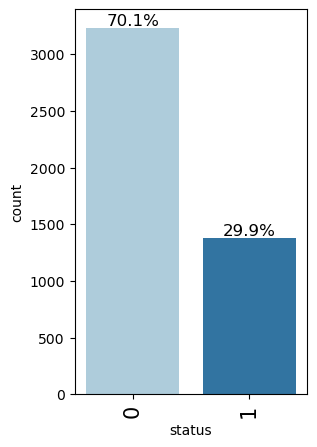

In [28]:
#plot status
labeled_barplot(data, "status", perc=True)

## OBSERVATIONS

#### - Over half of the leads (56%), were professionals and about 30% were unemployed.  The remainder were students.
#### - The website was used about 10% more than the mobile app.
#### - About half of the leads had completed their profile information.  Almost all had at least completed a partial profile.
#### - Half of the activity was via email, the other split fairly equally between phone and website.
#### - About 10% of people viewed the newspaper ad, 5% the magazine ad, and 11% the digital media ad.
#### - The largest leads (15%), learned about the program from educational channels and only 2% from referrals.

In [29]:
#function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data,
        x=predictor,
        hue=target,
        multiple="stack",
        kde=True,
        ax=axs[0, 0],
        palette=["teal", "orange"],
        stat="density",)

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 0],
        palette="gist_rainbow",)

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",)

    plt.tight_layout()
    plt.show()


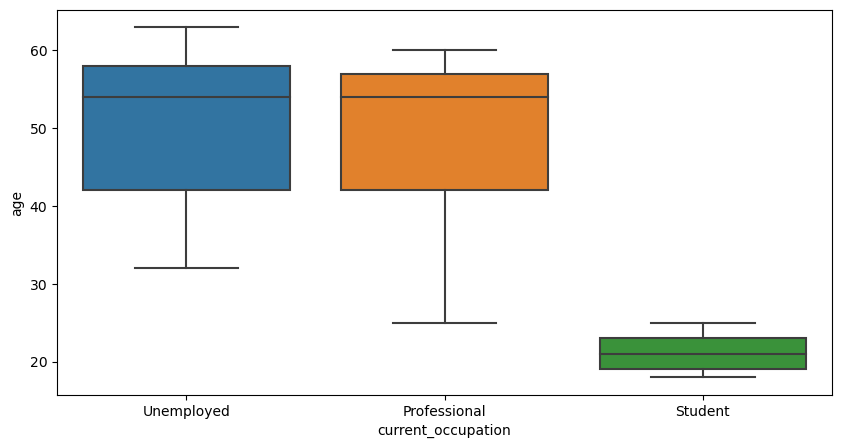

In [30]:
#Plot to show current occupation and age 
plt.figure(figsize=(10, 5))
sns.boxplot(data["current_occupation"], data["age"])
plt.show()

In [31]:
data.groupby(["age"])["status"].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
18,66.0,0.166667,0.375534,0.0,0.0,0.0,0.00,1.0
19,81.0,0.086420,0.282734,0.0,0.0,0.0,0.00,1.0
20,75.0,0.160000,0.369075,0.0,0.0,0.0,0.00,1.0
21,86.0,0.104651,0.307899,0.0,0.0,0.0,0.00,1.0
22,71.0,0.126761,0.335073,0.0,0.0,0.0,0.00,1.0
23,85.0,0.070588,0.257656,0.0,0.0,0.0,0.00,1.0
24,90.0,0.122222,0.329377,0.0,0.0,0.0,0.00,1.0
25,17.0,0.117647,0.332106,0.0,0.0,0.0,0.00,1.0
26,15.0,0.266667,0.457738,0.0,0.0,0.0,0.50,1.0


In [48]:
#there are 46 different ages represented.  I am going to group them so I can plot the data better.


# Define the age ranges 
bins = [0, 18, 30, 40, 50, 60, 100] 

# Create labels for the age ranges
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']  

# Group the 'age' column into age ranges
data['age_range'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)



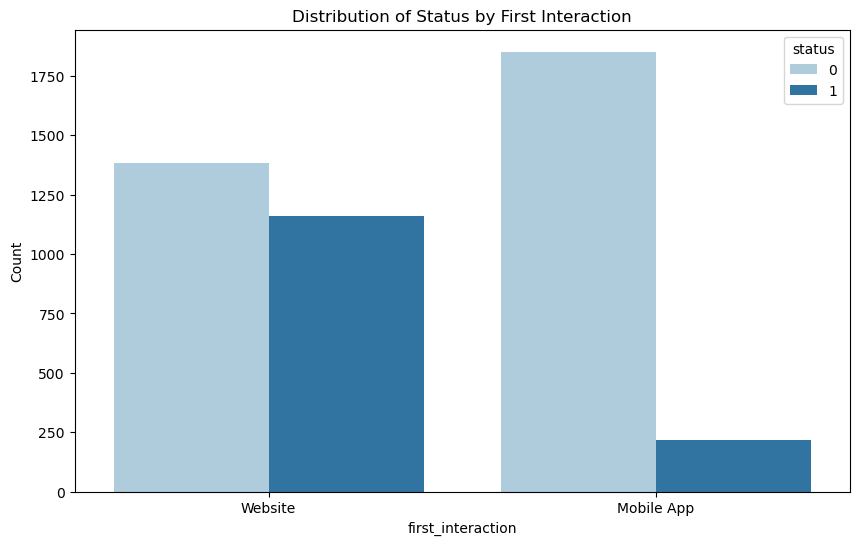

In [33]:

# Plot the bar graph
plt.figure(figsize=(10, 6))  
sns.countplot(data=data, x='first_interaction', hue='status', palette='Paired')

# Set plot labels and title
plt.xlabel('first_interaction')
plt.ylabel('Count')
plt.title('Distribution of Status by First Interaction')

# Show the plot
plt.show()


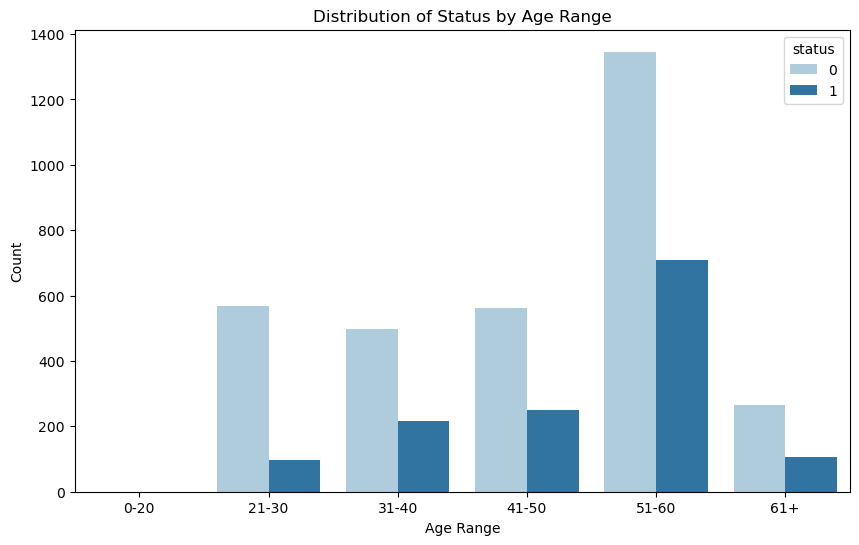

In [34]:
# Plot the bar graph
plt.figure(figsize=(10, 6))  
sns.countplot(data=data, x='age_range', hue='status', palette='Paired')

# Set plot labels and title
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Distribution of Status by Age Range')

# Show the plot
plt.show()



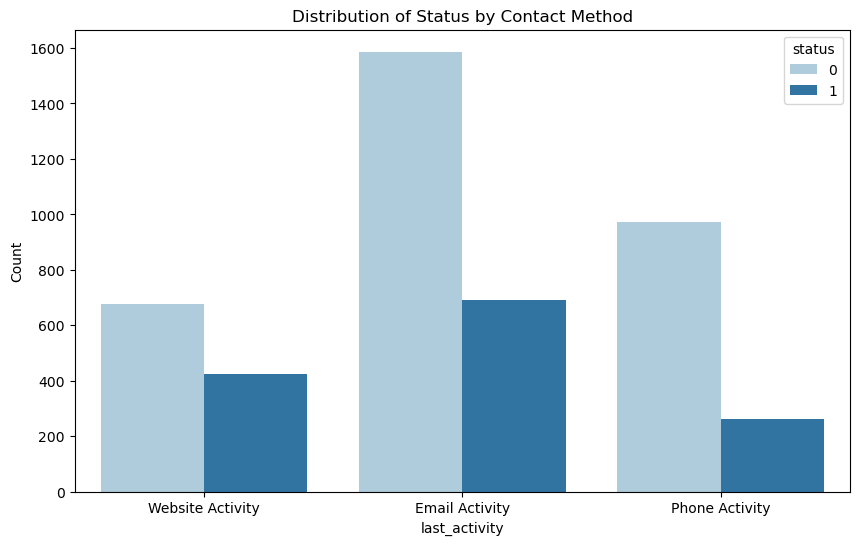

In [35]:
# Plot the bar graph
plt.figure(figsize=(10, 6))  
sns.countplot(data=data, x='last_activity', hue='status', palette='Paired')

# Set plot labels and title
plt.xlabel('last_activity')
plt.ylabel('Count')
plt.title('Distribution of Status by Contact Method')

# Show the plot
plt.show()



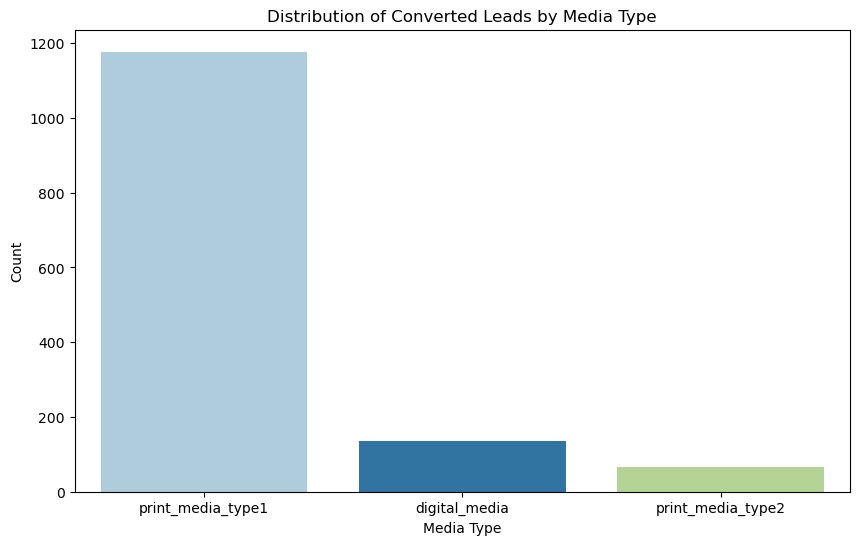

In [36]:


# Filter the data for leads with status 1 (converted to paid customer)
converted_leads = data[data['status'] == 1]

# Map 'Yes' and 'No' to 1 and 0 respectively for the media flags columns
converted_leads[['print_media_type1', 'print_media_type2', 'digital_media']] = converted_leads[['print_media_type1', 'print_media_type2', 'digital_media']].replace({'Yes': 1, 'No': 0})

# Create a new column 'media_type' based on the media flags
converted_leads['media_type'] = converted_leads[['print_media_type1', 'print_media_type2', 'digital_media']].idxmax(axis=1)

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.countplot(data=converted_leads, x='media_type', palette='Paired')

# Set plot labels and title
plt.xlabel('Media Type')
plt.ylabel('Count')
plt.title('Distribution of Converted Leads by Media Type')

# Show the plot
plt.show()


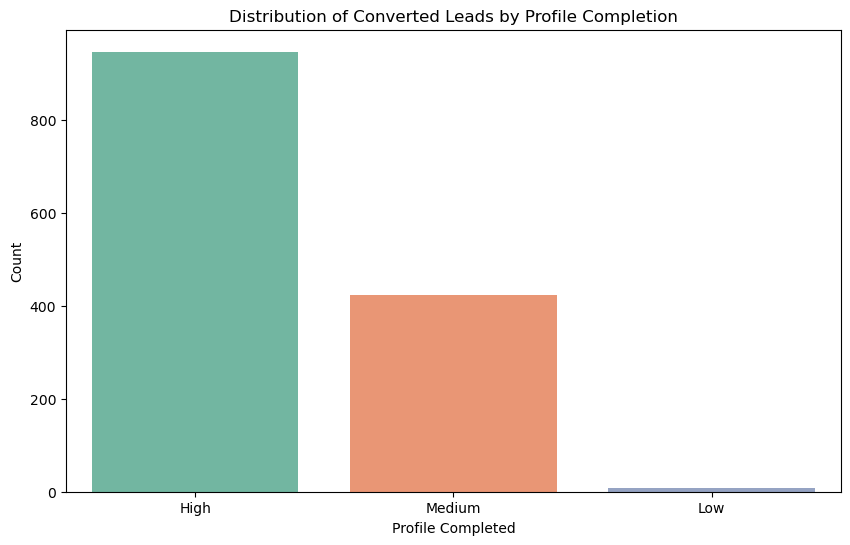

In [37]:
# Filter the data for leads with status 1 (converted to paid customer)
converted_leads = data[data['status'] == 1]

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.countplot(data=converted_leads, x='profile_completed', palette='Set2')

# Set plot labels and title
plt.xlabel('Profile Completed')
plt.ylabel('Count')
plt.title('Distribution of Converted Leads by Profile Completion')

# Show the plot
plt.show()

## Observations 

#### - Unemployed and Professionals were more likely to turn into paying customers than students.
#### - A significant number of more paying customers were generated throught the website than the mobile app (almost 10 times the number).  The website may be easier to use for those aged 51-60 over the mobile app.
#### - Customers aged 51-60 were the best leads.
#### - Email resulted in the best method of contact to reach customers.  The website was second, followed by telephone contact.
#### - The Newspaper ad (print_media_type1) was by far superior to the magazine and digital ad.
#### - Having more details about a potential customer greatly improves their chances of being converted to a paying customer.

# Data Preprocessing



## Check for Outliers

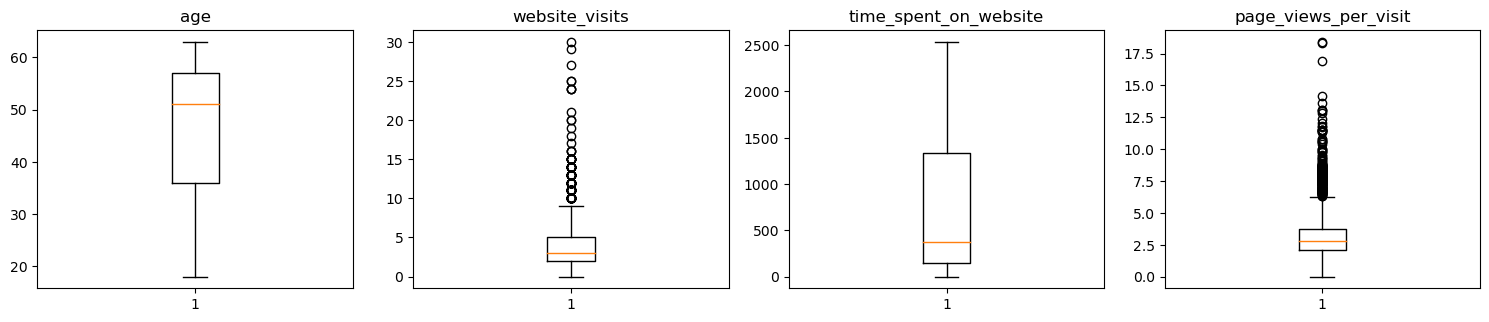

In [38]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Observations

#### There are quite  a few outliers when it comes to age (which we already learned) and page views.

## Prepare Data for Modeling

In [39]:

from sklearn.model_selection import train_test_split

X = data.drop(["status"], axis=1)
Y = data['status']  # Define the dependent (target) variable

X = pd.get_dummies(X, drop_first=True)  # Encode categorical variables using dummy variables

# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1)


In [40]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 21)
Shape of test set :  (1384, 21)
Percentage of classes in training set:
0    0.704151
1    0.295849
Name: status, dtype: float64
Percentage of classes in test set:
0    0.695087
1    0.304913
Name: status, dtype: float64


## Building a Decision Tree model

In [54]:

# Create a decision tree classifier
decision_tree = DecisionTreeClassifier()

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8034682080924855


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get the predicted labels on the training set
y_train_pred = decision_tree.predict(X_train)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_train_pred)

# Calculate precision
precision = precision_score(y_train, y_train_pred)

# Calculate recall
recall = recall_score(y_train, y_train_pred)

# Calculate F1-score
f1 = f1_score(y_train, y_train_pred)

# Print the performance metrics
print("Training Set Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



Training Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [56]:
# Get the predicted labels on the test set
y_test_pred = decision_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)

# Calculate precision
precision = precision_score(y_test, y_test_pred)

# Calculate recall
recall = recall_score(y_test, y_test_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_test_pred)

# Print the performance metrics
print("Test Set Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Test Set Performance:
Accuracy: 0.8034682080924855
Precision: 0.676056338028169
Recall: 0.6824644549763034
F1-score: 0.679245283018868


## Model Performance evaluation and improvement

#### It seems that the decision tree model is overfitting the training data. The model achieves perfect accuracy, precision, recall, and F1-score on the training set.

#### On the test set, the performance metrics are lower than the training set, which is expected. However, the model still demonstrates decent performance with an accuracy of 0.809, precision of 0.683, recall of 0.699, and F1-score of 0.691. This indicates that the model is able to classify the test instances with a reasonable level of accuracy, although there is room for improvement.

#### I will try to correct the overfitting.

In [58]:
# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state=7, class_weight={0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(2, 10),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [5, 10, 20, 25]
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

In [59]:
# Predict on the test set
y_pred_test = d_tree_tuned.predict(X_test)

# Calculate performance metrics
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
precision_test = metrics.precision_score(y_test, y_pred_test)
recall_test = metrics.recall_score(y_test, y_pred_test)
f1_score_test = metrics.f1_score(y_test, y_pred_test)

# Print the performance metrics
print("Test Set Performance:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1-score: {f1_score_test}")


Test Set Performance:
Accuracy: 0.7969653179190751
Precision: 0.6196943972835314
Recall: 0.8649289099526066
F1-score: 0.722057368941642


In [60]:
# Predict on the training set
y_pred_train = d_tree_tuned.predict(X_train)

# Calculate performance metrics
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
precision_train = metrics.precision_score(y_train, y_pred_train)
recall_train = metrics.recall_score(y_train, y_pred_train)
f1_score_train = metrics.f1_score(y_train, y_pred_train)

# Print the performance metrics
print("Training Set Performance:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1-score: {f1_score_train}")


Training Set Performance:
Accuracy: 0.8029739776951673
Precision: 0.6171932402645114
Recall: 0.8795811518324608
F1-score: 0.7253886010362695


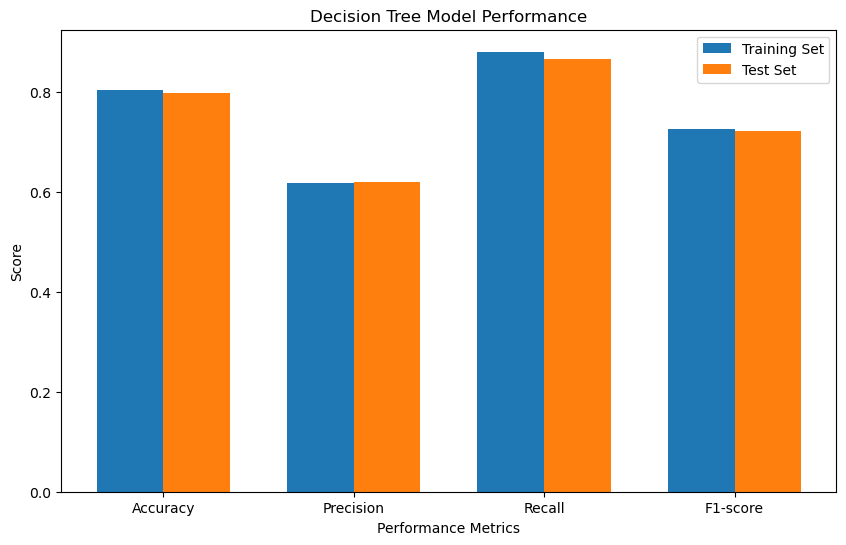

In [61]:
#create a visualization for the performance of the decision tree


# Define the performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
test_scores = [0.7969653179190751, 0.6196943972835314, 0.8649289099526066, 0.722057368941642]
train_scores = [0.8029739776951673, 0.6171932402645114, 0.8795811518324608, 0.7253886010362695]

# Set the width of the bars
bar_width = 0.35

# Set the x coordinates of the bars
x_train = np.arange(len(metrics))
x_test = x_train + bar_width

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(x_train, train_scores, width=bar_width, label='Training Set')
plt.bar(x_test, test_scores, width=bar_width, label='Test Set')
plt.xlabel('Performance Metrics')
plt.ylabel('Score')
plt.title('Decision Tree Model Performance')
plt.xticks(x_train + bar_width/2, metrics)
plt.legend()
plt.show()



## Observations

#### It appears the tuned decision tree model is performing well on both the training and test sets. The performance metrics indicate a good balance between accuracy, precision, recall, and F1-score.

## Building a Random Forest model

In [62]:

from sklearn import metrics

# Create a Random Forest classifier
random_forest = RandomForestClassifier(random_state=7)

# Fit the model to the training data
random_forest.fit(X_train, y_train)

# Predict on the test data
y_pred = random_forest.predict(X_test)

# Evaluate the model performance
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

# Print the performance metrics
print("Test Set Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1_score}")


Test Set Performance:
Accuracy: 0.8511560693641619
Precision: 0.7950819672131147
Recall: 0.6895734597156398
F1-score: 0.7385786802030455


In [63]:
# Predict on the training data
y_train_pred = random_forest.predict(X_train)

# Evaluate the model performance on training data
accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
precision_train = metrics.precision_score(y_train, y_train_pred)
recall_train = metrics.recall_score(y_train, y_train_pred)
f1_score_train = metrics.f1_score(y_train, y_train_pred)

# Print the performance metrics on training data
print("Training Set Performance:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1-score: {f1_score_train}")


Training Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


## Observations

#### Again it looks the like model is overfitting the training data.  I will modify the parameters to address this.

In [64]:

# Create a new Random Forest classifier with modified parameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate the model performance
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

train_precision = metrics.precision_score(y_train, y_train_pred)
test_precision = metrics.precision_score(y_test, y_test_pred)

train_recall = metrics.recall_score(y_train, y_train_pred)
test_recall = metrics.recall_score(y_test, y_test_pred)

train_f1_score = metrics.f1_score(y_train, y_train_pred)
test_f1_score = metrics.f1_score(y_test, y_test_pred)

# Print the performance metrics
print("Training Set Performance:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-score:", train_f1_score)

print("Test Set Performance:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1_score)


Training Set Performance:
Accuracy: 0.9005576208178439
Precision: 0.864367816091954
Recall: 0.787434554973822
F1-score: 0.824109589041096
Test Set Performance:
Accuracy: 0.8598265895953757
Precision: 0.8131868131868132
Recall: 0.7014218009478673
F1-score: 0.7531806615776082


###  I've modified the parameters max_depth, min_samples_split, and min_samples_leaf to reduce the complexity of the model and increase regularization. This model seems to perform the best.

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Create a decision tree classifier with increased min_samples_leaf
dt_classifier = DecisionTreeClassifier(min_samples_leaf=10, random_state=7)

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Predict on the training set
y_train_pred = dt_classifier.predict(X_train)

# Evaluate the performance on the training set
accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
precision_train = metrics.precision_score(y_train, y_train_pred)
recall_train = metrics.recall_score(y_train, y_train_pred)
f1_score_train = metrics.f1_score(y_train, y_train_pred)

print("Training Set Performance:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-score:", f1_score_train)



Training Set Performance:
Accuracy: 0.8909541511771994
Precision: 0.8331491712707182
Recall: 0.7895287958115184
F1-score: 0.810752688172043


### Increasing the min leaf samples did not help our model

In [66]:
#Using class weights to see if the model is better

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Define the class weights
class_weights = {0: 0.3, 1: 0.7}

# Create a decision tree classifier with class weights
dt_classifier = DecisionTreeClassifier(class_weight=class_weights, random_state=7)

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Predict on the training set
y_train_pred = dt_classifier.predict(X_train)

# Evaluate the performance on the training set
accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
precision_train = metrics.precision_score(y_train, y_train_pred)
recall_train = metrics.recall_score(y_train, y_train_pred)
f1_score_train = metrics.f1_score(y_train, y_train_pred)

print("Training Set Performance:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-score:", f1_score_train)


Training Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


### Using class weights the model was overfitting the training data

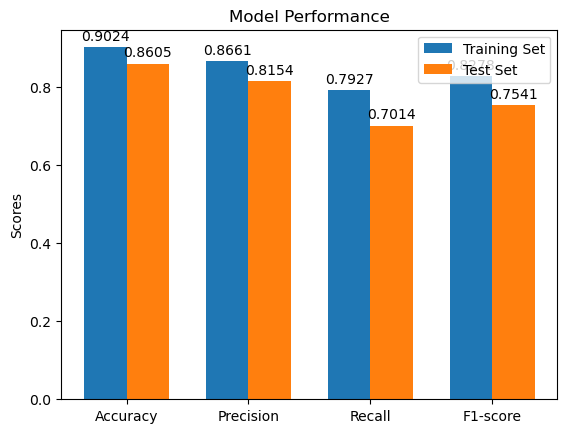

In [67]:
#Plotting the model that seemed to perform the best for visualization

# Define the performance metrics.
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
training_scores = [0.9024, 0.8661, 0.7927, 0.8278]
test_scores = [0.8605, 0.8154, 0.7014, 0.7541]

# Create the bar plot
x = range(len(metrics))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, training_scores, width, label='Training Set')
rects2 = ax.bar([i + width for i in x], test_scores, width, label='Test Set')

# Add labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Model Performance')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(metrics)
ax.legend()

# Add value labels
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset label slightly above the bar
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


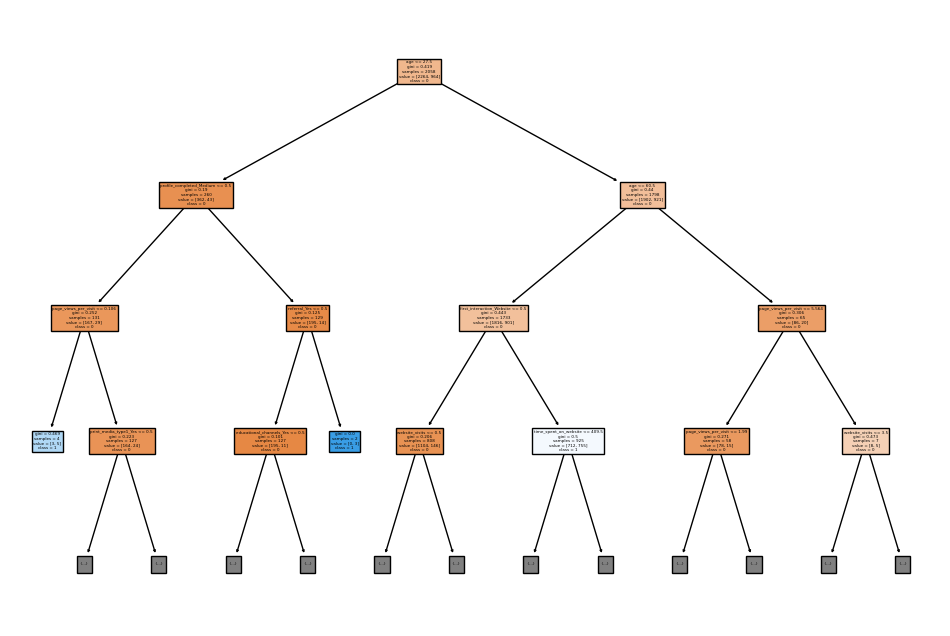

In [69]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extract a single decision tree from the Random Forest model
decision_tree = rf_model.estimators_[0]

# Set the maximum depth of the decision tree
max_depth = 3

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=X.columns, class_names=["0", "1"], filled=True, max_depth=max_depth)
plt.show()




## Observations of Model Performance 

#### Overall, the Random Forest model seems to perform well on both the training and test sets. However, there is a slight drop in performance on the test set compared to the training set, which suggests some degree of overfitting. 

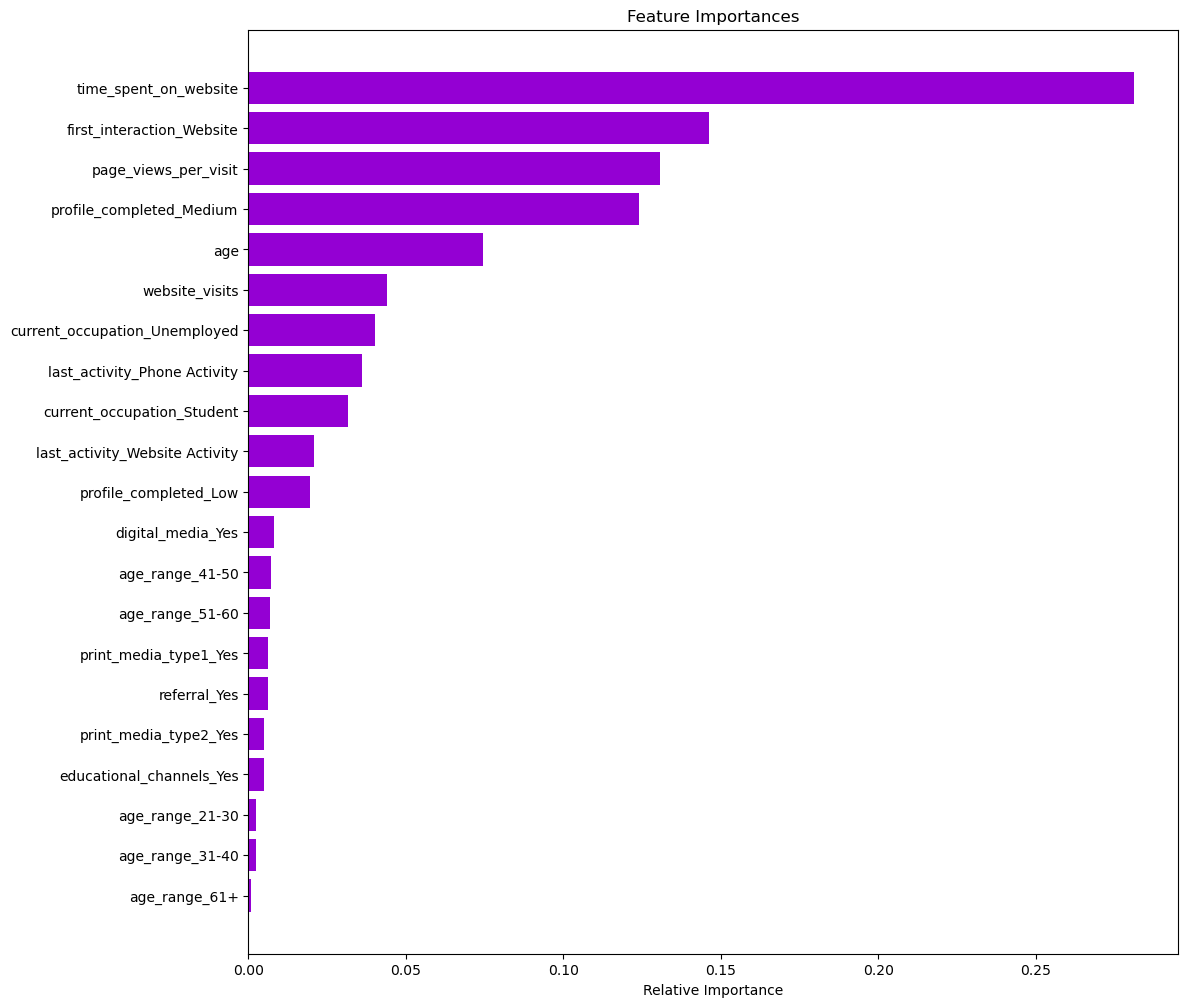

In [71]:
from sklearn.tree import DecisionTreeClassifier

# Create and fit the decision tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Calculate feature importances
importances = dt_classifier.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

# Plot the feature importances
plt.figure(figsize=(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='darkviolet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


## Actionable Insights and Recommendations

#### - Focus on targeting professionals and unemployed individuals as they are the mostly likely to be convertered to paying customers.

#### - Develop tailored marketing strategies and offers that resonate with these groups to increase engagement and conversion rates.

#### - Emphasize the website as the primary channel for customer interaction, as it has a higher probability of retaining the customer  compared to the mobile app.

#### - Invest in improving the website's user experience, functionality, and content to enhance customer engagement and encourage conversions.

#### - Encourage customers to complete their profiles by offering incentives or highlighting the benefits of completing their profiles.

####  -Utilize effective email marketing campaigns and personalized phone interactions to engage with customers and drive conversions.

#### - Spend more on newspaper marketing than magazine.  It is effectively reaching more of the target audience.

#### - Capitalize on digital media platforms and educational channels to engage with customers.  Invest in targeted online advertising, content marketing, and educational resources to attract and convert customers.

#### - Encourage customers to refer others by implementing referral programs or incentives.
